In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
df.shape

(42, 2)

In [4]:
df[['Quarter_Num', 'Year']] = df['Quarter'].str.extract(r'Q(\d)_(\d+)', expand=True)

In [5]:
df['Quarter_Num'] = pd.to_numeric(df['Quarter_Num'])
df['Year'] = pd.to_numeric(df['Year'])

In [6]:
df.head(5)

,Quarter,Sales,Quarter_Num,Year
0,Q1_86,1734.827000,1,86
1,Q2_86,2244.960999,2,86
2,Q3_86,2533.804993,3,86
3,Q4_86,2154.962997,4,86
4,Q1_87,1547.818996,1,87


In [7]:
df['Q1'] = (df['Quarter_Num'] == 1).astype(int)
df['Q2'] = (df['Quarter_Num'] == 2).astype(int)
df['Q3'] = (df['Quarter_Num'] == 3).astype(int)
df['Q4'] = (df['Quarter_Num'] == 4).astype(int)

In [8]:
df.head(5)

,Quarter,Sales,Quarter_Num,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,1,86,1,0,0,0
1,Q2_86,2244.960999,2,86,0,1,0,0
2,Q3_86,2533.804993,3,86,0,0,1,0
3,Q4_86,2154.962997,4,86,0,0,0,1
4,Q1_87,1547.818996,1,87,1,0,0,0


In [9]:
df.describe()

,Sales,Quarter_Num,Year,Q1,Q2,Q3,Q4
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,2994.353308,2.452381,90.761905,0.261905,0.261905,0.238095,0.238095
std,977.930896,1.130560,3.074756,0.445001,0.445001,0.431081,0.431081
min,1547.818996,1.000000,86.000000,0.000000,0.000000,0.000000,0.000000
25%,2159.714247,1.250000,88.000000,0.000000,0.000000,0.000000,0.000000
50%,2782.376999,2.000000,91.000000,0.000000,0.000000,0.000000,0.000000
75%,3609.250000,3.000000,93.000000,0.750000,0.750000,0.000000,0.000000
max,5253.000000,4.000000,96.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

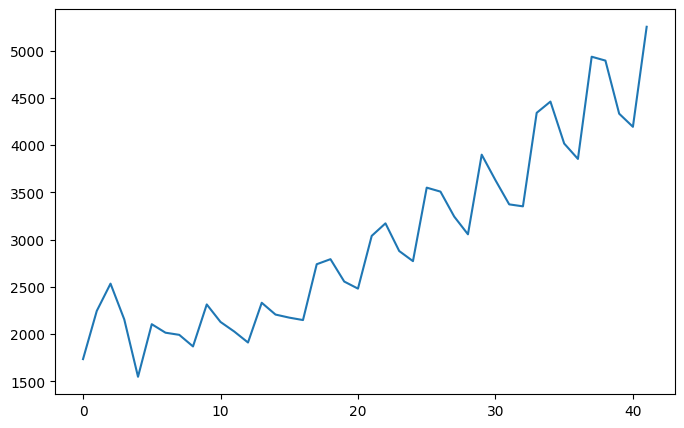

In [11]:
plt.figure(figsize=(8,5))
plt.plot(df['Sales'])
plt.show()

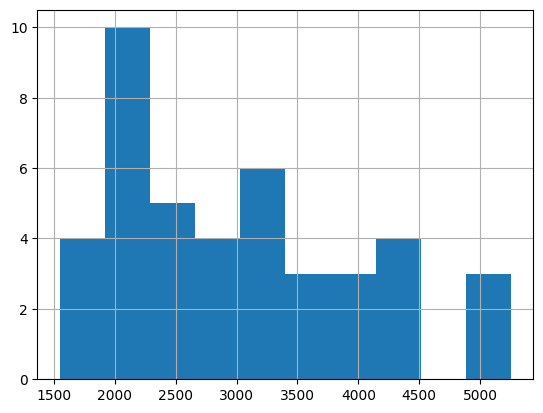

In [12]:
df['Sales'].hist()
plt.show()

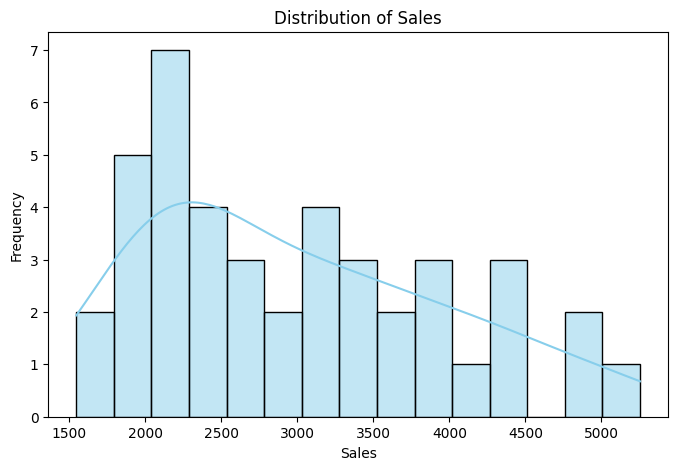

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

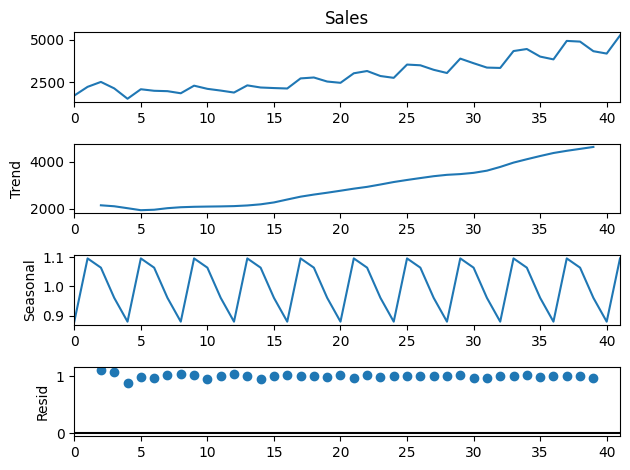

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Sales'], model='multiplicative', period=4)
result.plot()
plt.show()

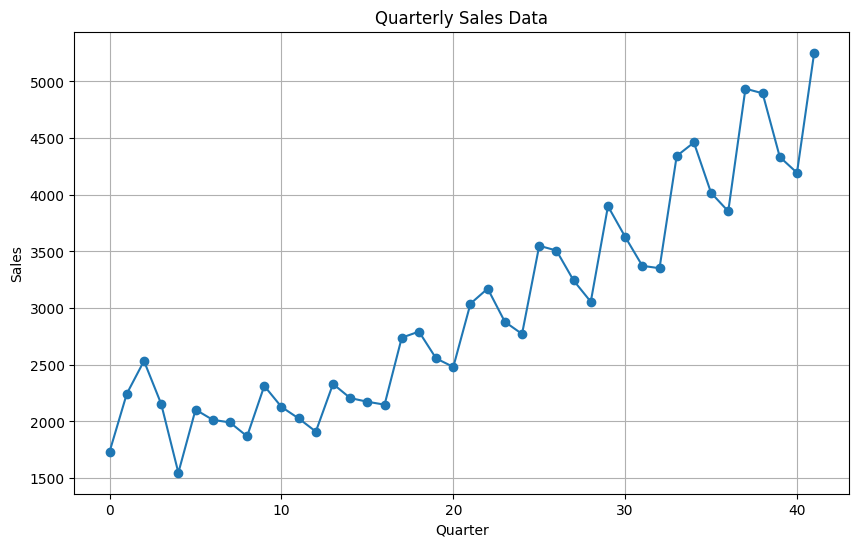

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Sales'], marker='o', linestyle='-')
plt.title('Quarterly Sales Data')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [16]:
df["t"] = np.arange(1,43)
df["t_squared"] = df["t"]*df["t"]

df["log_sales"] = np.log(df["Sales"])

df.head()

,Quarter,Sales,Quarter_Num,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,1,87,1,0,0,0,5,25,7.344602


In [17]:
train = df.head(32)
test = df.tail(10)

In [18]:
# Uing Exponential Methods

In [19]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression

In [20]:
ses_model = SimpleExpSmoothing(train['Sales']).fit()
ses_pred = ses_model.forecast(len(test))

In [21]:
ses_rmse = mean_squared_error(test['Sales'], ses_pred, squared=False)

In [22]:
print(f"Simple Exponential Smoothing RMSE: {ses_rmse}")

Simple Exponential Smoothing RMSE: 1034.935926527898


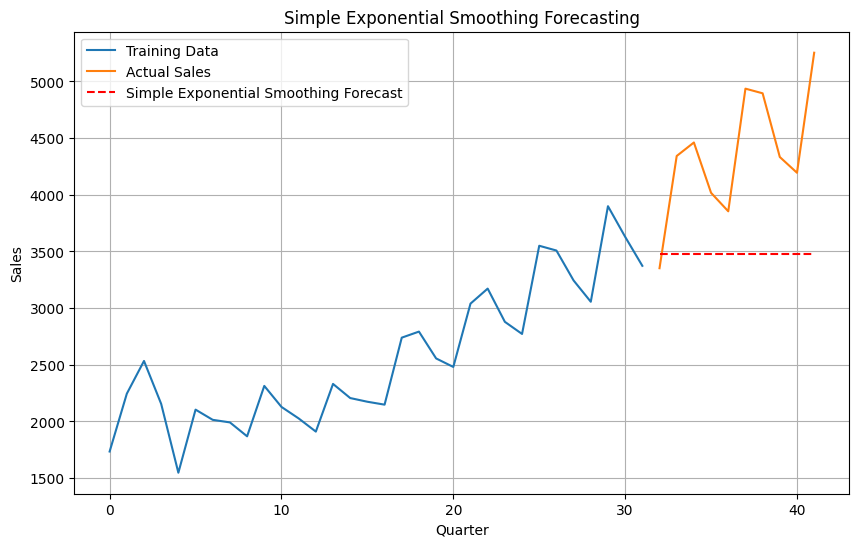

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(train['Sales'], label='Training Data')
plt.plot(test.index, test['Sales'], label='Actual Sales')
plt.plot(test.index, ses_pred, label='Simple Exponential Smoothing Forecast', linestyle='--', color='red')
plt.title('Simple Exponential Smoothing Forecasting')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Holt method (Double Exponential)

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [26]:
holt_model = ExponentialSmoothing(train['Sales'], trend='add').fit()
holt_pred = holt_model.forecast(len(test))

In [27]:
holt_rmse = mean_squared_error(test['Sales'], holt_pred, squared=False)

In [28]:
print(f"Holt Exponential Smoothing RMSE: {holt_rmse}")

Holt Exponential Smoothing RMSE: 513.8997413947645


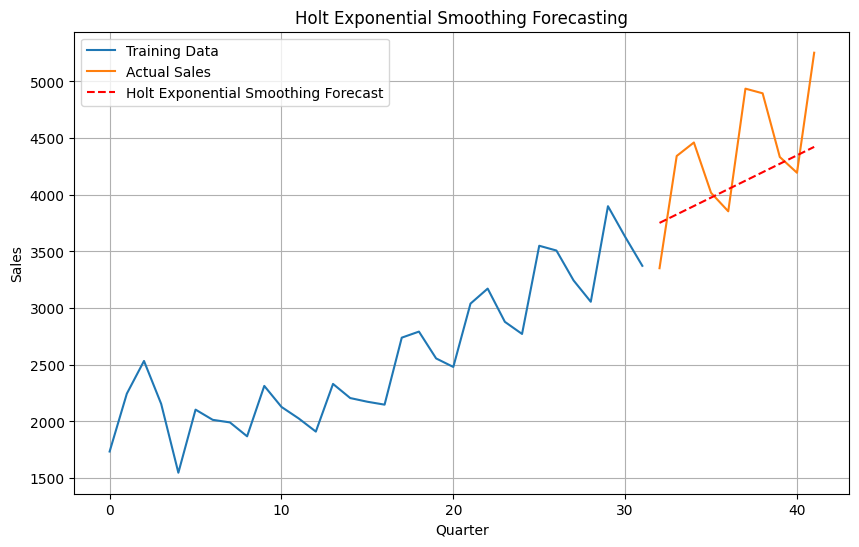

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(train['Sales'], label='Training Data')
plt.plot(test.index, test['Sales'], label='Actual Sales')
plt.plot(test.index, holt_pred, label='Holt Exponential Smoothing Forecast', linestyle='--', color='red')
plt.title('Holt Exponential Smoothing Forecasting')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)

In [31]:
triple_exponential_model = ExponentialSmoothing(train['Sales'], trend='add', seasonal='add', seasonal_periods=4).fit()
triple_exponential_pred = triple_exponential_model.forecast(len(test))

In [32]:
triple_exponential_rmse = mean_squared_error(test['Sales'], triple_exponential_pred, squared=False)

In [33]:
print(f"Triple Exponential Smoothing RMSE: {triple_exponential_rmse}")

Triple Exponential Smoothing RMSE: 610.227144270313


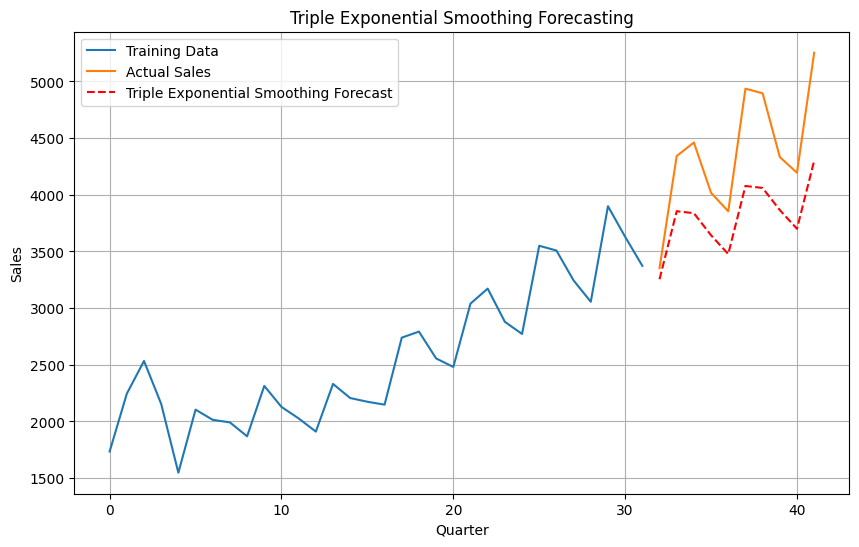

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(train['Sales'], label='Training Data')
plt.plot(test.index, test['Sales'], label='Actual Sales')
plt.plot(test.index, triple_exponential_pred, label='Triple Exponential Smoothing Forecast', linestyle='--', color='red')
plt.title('Triple Exponential Smoothing Forecasting')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential)

In [36]:
holt_winters_model = ExponentialSmoothing(train['Sales'], trend='add', seasonal='mul', seasonal_periods=4).fit()
holt_winters_pred = holt_winters_model.forecast(len(test))

In [37]:
holt_winters_rmse = mean_squared_error(test['Sales'], holt_winters_pred, squared=False)

In [38]:
print(f"Holt-Winters Exponential Smoothing with multiplicative seasonality and additive trend RMSE: {holt_winters_rmse}")

Holt-Winters Exponential Smoothing with multiplicative seasonality and additive trend RMSE: 569.0540408448411


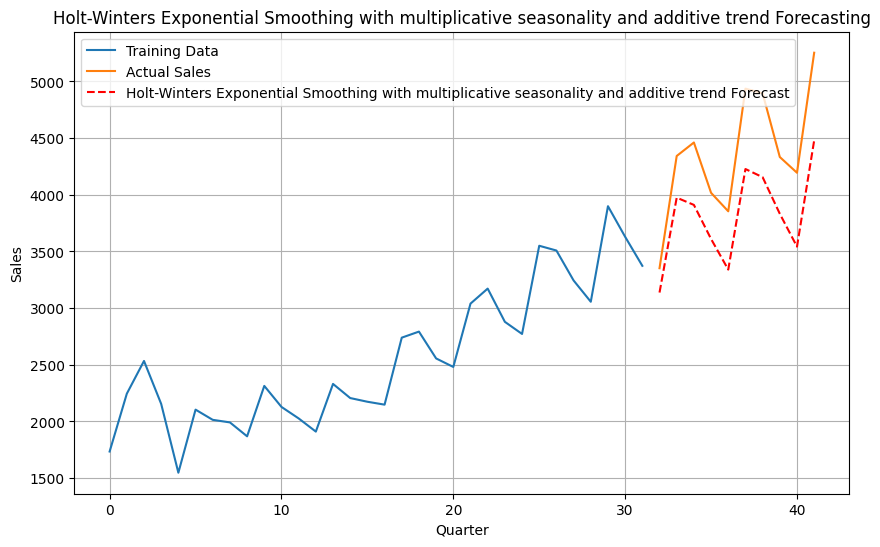

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(train['Sales'], label='Training Data')
plt.plot(test.index, test['Sales'], label='Actual Sales')
plt.plot(test.index, holt_winters_pred, label='Holt-Winters Exponential Smoothing with multiplicative seasonality and additive trend Forecast', linestyle='--', color='red')
plt.title('Holt-Winters Exponential Smoothing with multiplicative seasonality and additive trend Forecasting')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Holts winter exponential smoothing with Additive seasonality and multiplicative trend

In [41]:
holt_winters_model1 = ExponentialSmoothing(train['Sales'], trend='mul', seasonal='add', seasonal_periods=4).fit()
holt_winters_pred1 = holt_winters_model.forecast(len(test))

In [42]:
holt_winters_rmse1 = mean_squared_error(test['Sales'], holt_winters_pred1, squared=False)

In [43]:
print(f"Holt-Winters Exponential Smoothing with Additive seasonality and multiplicative trend RMSE: {holt_winters_rmse1}")

Holt-Winters Exponential Smoothing with Additive seasonality and multiplicative trend RMSE: 569.0540408448411


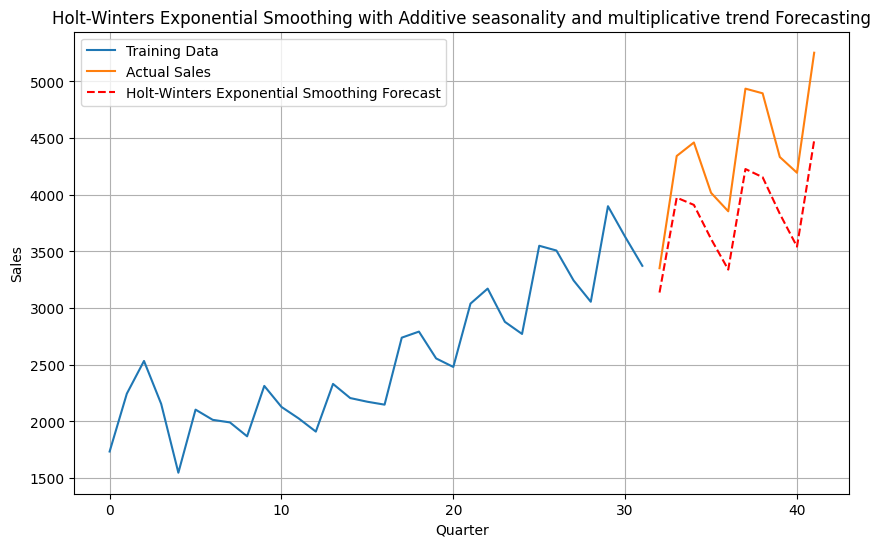

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(train['Sales'], label='Training Data')
plt.plot(test.index, test['Sales'], label='Actual Sales')
plt.plot(test.index, holt_winters_pred1, label='Holt-Winters Exponential Smoothing Forecast', linestyle='--', color='red')
plt.title('Holt-Winters Exponential Smoothing with Additive seasonality and multiplicative trend Forecasting')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend 

In [46]:
holt_winters_model2 = ExponentialSmoothing(train['Sales'], trend='mul', seasonal='mul', seasonal_periods=4).fit()
holt_winters_pred2 = holt_winters_model.forecast(len(test))

In [47]:
holt_winters_rmse2 = mean_squared_error(test['Sales'], holt_winters_pred2, squared=False)

In [48]:
print(f"Holt-Winters Exponential Smoothing with multiplicative seasonality and multiplicative trend  RMSE: {holt_winters_rmse}")

Holt-Winters Exponential Smoothing with multiplicative seasonality and multiplicative trend  RMSE: 569.0540408448411


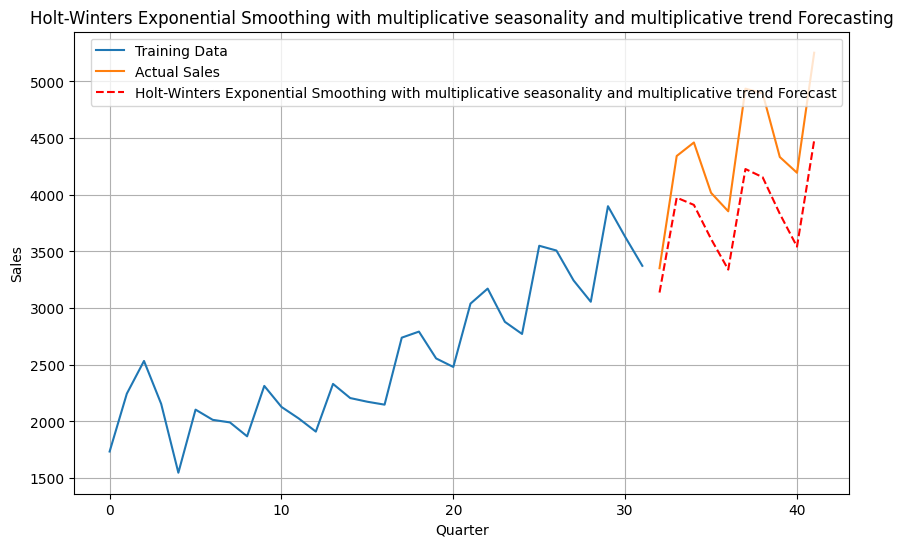

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(train['Sales'], label='Training Data')
plt.plot(test.index, test['Sales'], label='Actual Sales')
plt.plot(test.index, holt_winters_pred2, label='Holt-Winters Exponential Smoothing with multiplicative seasonality and multiplicative trend Forecast', linestyle='--', color='red')
plt.title('Holt-Winters Exponential Smoothing with multiplicative seasonality and multiplicative trend Forecasting')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

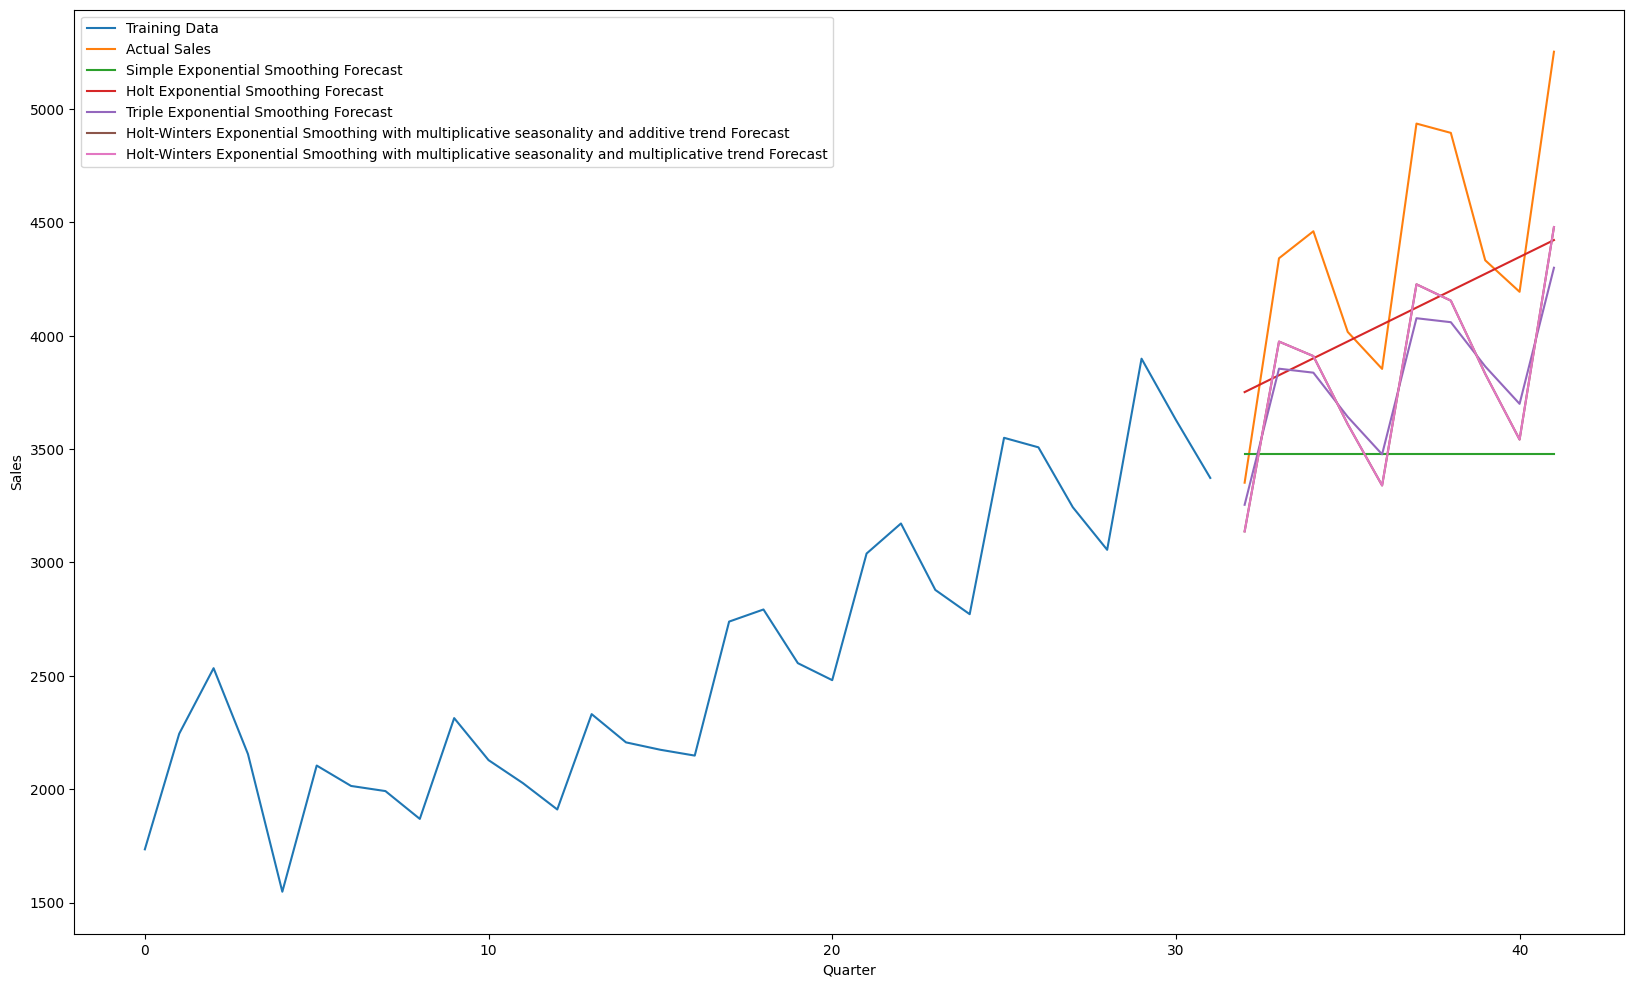

In [50]:
plt.figure(figsize=(20,12))

plt.plot(train['Sales'], label='Training Data')
plt.plot(test.index, test['Sales'], label='Actual Sales')

plt.plot(test.index, ses_pred, label='Simple Exponential Smoothing Forecast')

plt.plot(test.index, holt_pred, label='Holt Exponential Smoothing Forecast')

plt.plot(test.index, triple_exponential_pred, label='Triple Exponential Smoothing Forecast')

plt.plot(test.index, holt_winters_pred, label='Holt-Winters Exponential Smoothing with multiplicative seasonality and additive trend Forecast')

plt.plot(test.index, holt_winters_pred2, label='Holt-Winters Exponential Smoothing with multiplicative seasonality and multiplicative trend Forecast')


plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()

In [51]:
# SARIMA Model

sarima_model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
sarima_results = sarima_model.fit(disp=False)
sarima_predictions = sarima_results.get_forecast(len(test))
sarima_rmse = mean_squared_error(test['Sales'], sarima_predictions.predicted_mean, squared=False)
print(f"SARIMA Model RMSE: {sarima_rmse}")

SARIMA Model RMSE: 704.2269979863926


In [52]:
# Linear Regression Model

linear_model = LinearRegression()
linear_model.fit(train[['Q2', 'Q3', 'Q4']], train['Sales'])
linear_predictions = linear_model.predict(test[['Q2', 'Q3', 'Q4']])
linear_rmse = mean_squared_error(test['Sales'], linear_predictions, squared=False)

print(f"Linear Model RMSE: {linear_rmse}")

Linear Model RMSE: 1850.466546185836


In [53]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [55]:
import statsmodels.formula.api as smf 

In [56]:
Quad = smf.ols('Sales~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad_model = RMSE(test['Sales'], pred_Quad)
print(f"Quadratic Model: {rmse_Quad_model}")

Quadratic Model: 457.73573554072897


In [57]:
list = [['Simple Exp', ses_rmse], ['Double Exp', holt_rmse], ['Triple Exp', triple_exponential_rmse],
        ['Holt-Winters Exp1',holt_winters_rmse],['Holts winter exp1', holt_winters_rmse1],
        ['Holts winter exp2', holt_winters_rmse2],['SARIMA Model', sarima_rmse],
        ['Linear Model', linear_rmse],['Quadratic Model', rmse_Quad_model]
       ]
df1 = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
df1

,Model,RMSE_Value
0,Simple Exp,1034.935927
1,Double Exp,513.899741
2,Triple Exp,610.227144
3,Holt-Winters Exp1,569.054041
4,Holts winter exp1,569.054041
5,Holts winter exp2,569.054041
6,SARIMA Model,704.226998
7,Linear Model,1850.466546
8,Quadratic Model,457.735736


In [58]:
final_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=df).fit()
pred_final = pd.Series(final_model.predict(df[['Q1','Q2','Q3','t','t_squared']]))
rmse_final_model = RMSE(df['Sales'], pred_final)
rmse_final_model

159.0552257652247

In [59]:
pred_df = pd.DataFrame({'Actual' : df.Sales, 'Predicted' : pred_final})
pred_df

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709


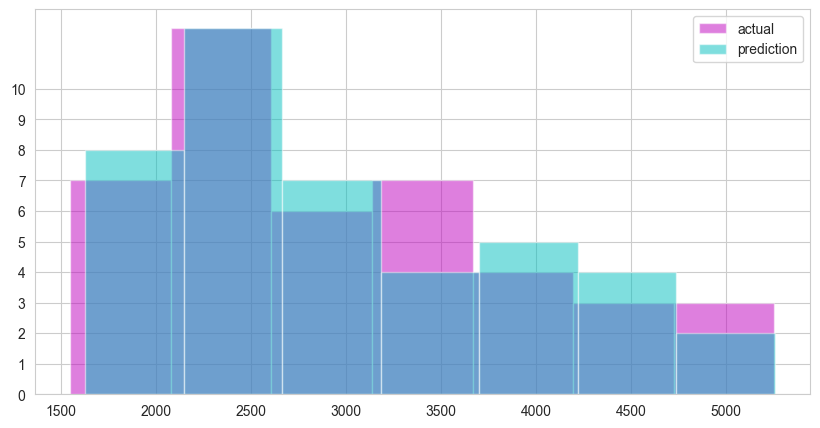

In [60]:
sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (10, 5) 
_, ax = plt.subplots()
ax.hist(df.Sales, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred_final, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

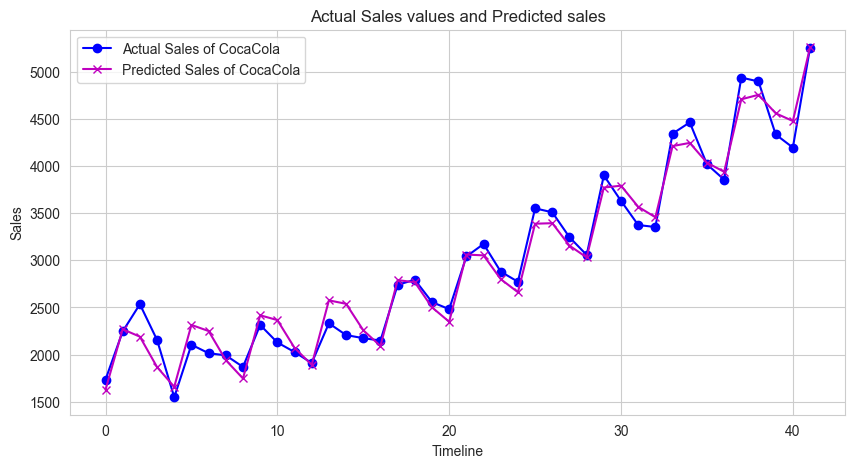

In [61]:
plt.plot(df.Sales, color='b',marker='o', label='Actual Sales of CocaCola')
plt.plot(pred_final, color='m',marker='x', label='Predicted Sales of CocaCola')

plt.title('Actual Sales values and Predicted sales')
plt.xlabel("Timeline")
plt.ylabel("Sales")
plt.legend()
plt.rcParams['figure.figsize'] = (10,5) 

plt.show()